# Time Series Analysis and Forecasting

This guide demonstrates how to perform time series analysis and forecasting on the Ontario retirement house investment dataset, focusing on features like **Property Prices** or **Occupancy Rates** over time.

## Steps

1. **Preparation**: Format the dataset for time series analysis.
2. **Exploratory Data Analysis**: Visualize time series data.
3. **Model Selection**: Use Facebook Prophet for forecasting.
4. **Forecasting**: Predict future values of property prices or occupancy rates.

## Step 1: Preparation

First, ensure the dataset is set up correctly for time series analysis.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('..//Data/ontario_retirement_house_investment_data.csv')


## Missing value check

In [48]:
if df['Date'].isnull().any():
    raise ValueError("There are missing values in the 'Date' column. Please clean the data.")

### Ensure data is in Date format

In [49]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check if there are any missing values in the 'Date' column


# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Filter for one city, for example 'London'
df_london = df[df['City'] == 'London']

# Display the first few rows to ensure it's set up correctly
df_london.head()


,City,Property_Price,Occupancy_Rate,Inflation_Rate,Population_Age_65+,Population_Age_65_Growth,Median_Age,Income_Level,Proximity_to_Healthcare,Walkability_Score,Crime_Rate,Property_Tax_Rate,Public_Transport_Access,Government_Incentives,Environmental_Quality,Senior_Living_Vacancy_Rate,Mental_Health_Programs,Memory_Care_Availability
Date,,,,,,,,,,,,,,,,,,
2010-01-01,London,848703,71,2.68,45565,2.13,42,76100,3,64,10,1,1,1,91.733793,12.690232,1,1
2010-02-01,London,986957,93,2.74,44538,2.77,47,38783,3,52,7,1,1,1,82.506671,5.833026,0,0
2010-03-01,London,943318,83,1.61,33963,0.70,42,59665,9,84,6,2,0,1,70.895383,13.320621,0,1
2010-04-01,London,934355,72,3.64,60330,1.96,44,40350,7,88,1,2,1,1,75.354998,9.718430,1,1
2010-05-01,London,860795,74,2.93,50283,2.65,46,57408,4,70,9,2,0,1,78.870686,12.438621,0,1


### Let's explore data as Occupancy rate and Property prices over time for London

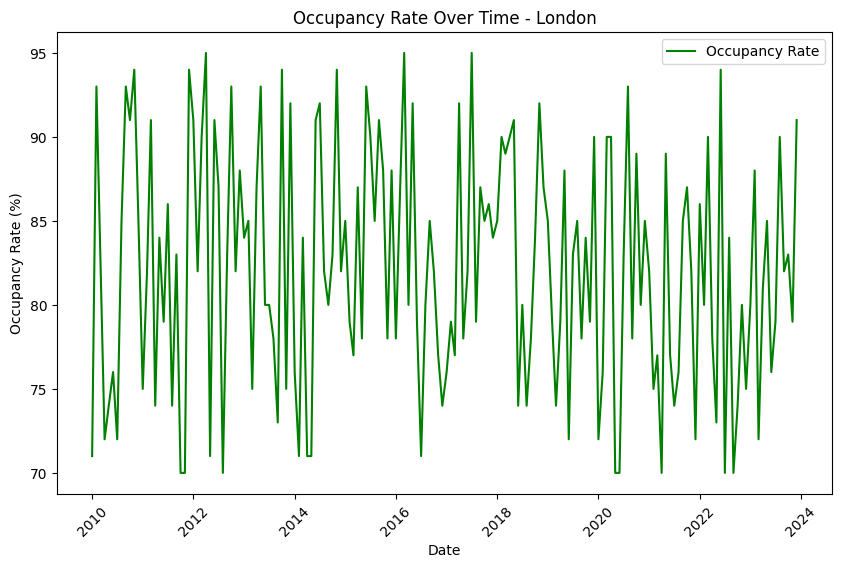

In [25]:

# Plot occupancy rate over time for London
plt.figure(figsize=(10, 6))
plt.plot(df_london.index, df_london['Occupancy_Rate'], label='Occupancy Rate', color='green')
plt.title('Occupancy Rate Over Time - London')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


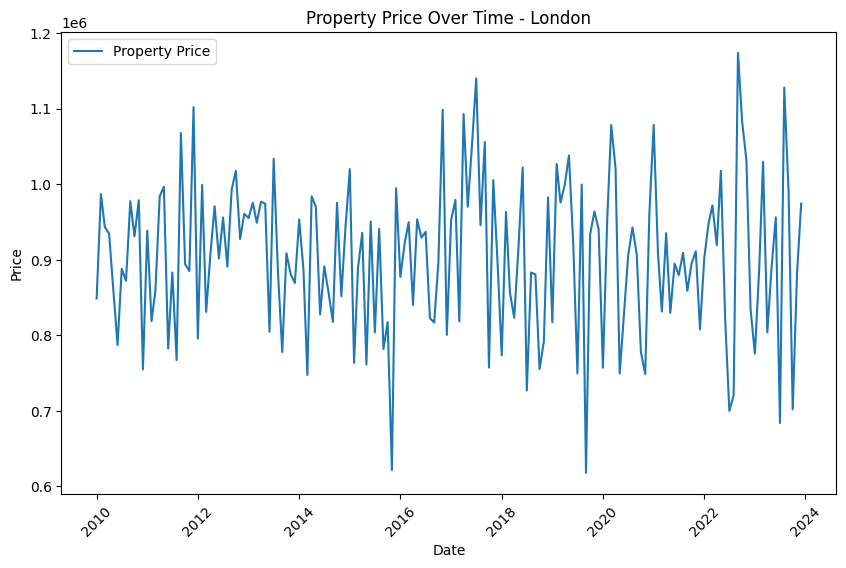

In [26]:
# Plot property prices over time for London
plt.figure(figsize=(10, 6))
plt.plot(df_london.index, df_london['Property_Price'], label='Property Price')
plt.title('Property Price Over Time - London')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Decomposition of Time Series

We will use seasonal decomposition to split the time series into trend, seasonality, and residuals using Python's ***statsmodels*** library.

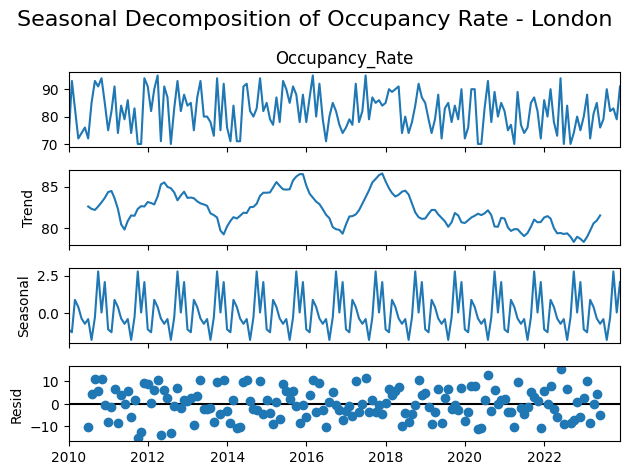

In [63]:
# Perform seasonal decomposition on the Property_Price series
result = seasonal_decompose(df_london['Occupancy_Rate'], model='additive', period=12)

# Plot the decomposition
fig=result.plot()
fig.suptitle('Seasonal Decomposition of Occupancy Rate - London', fontsize=16)
plt.tight_layout()
plt.show()


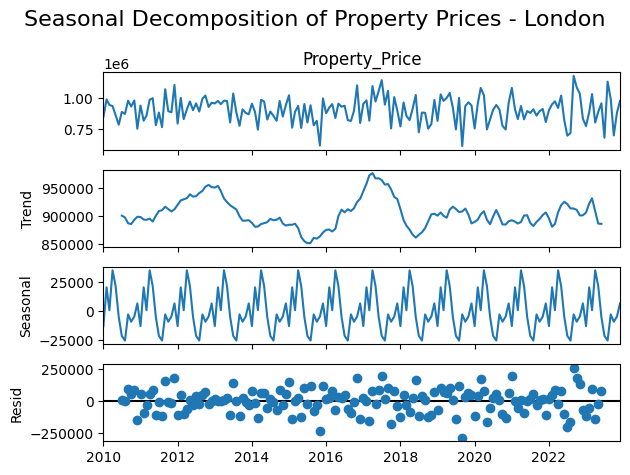

In [62]:
# Perform seasonal decomposition on the Property_Price series London
result = seasonal_decompose(df_london['Property_Price'], model='additive', period=12)

# Plot the decomposition
fig=result.plot()
fig.suptitle('Seasonal Decomposition of Property Prices - London', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\Zekiye\AppData\Local\Temp\ipykernel_24768\1795910928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_london['Month'] = df_london.index.month


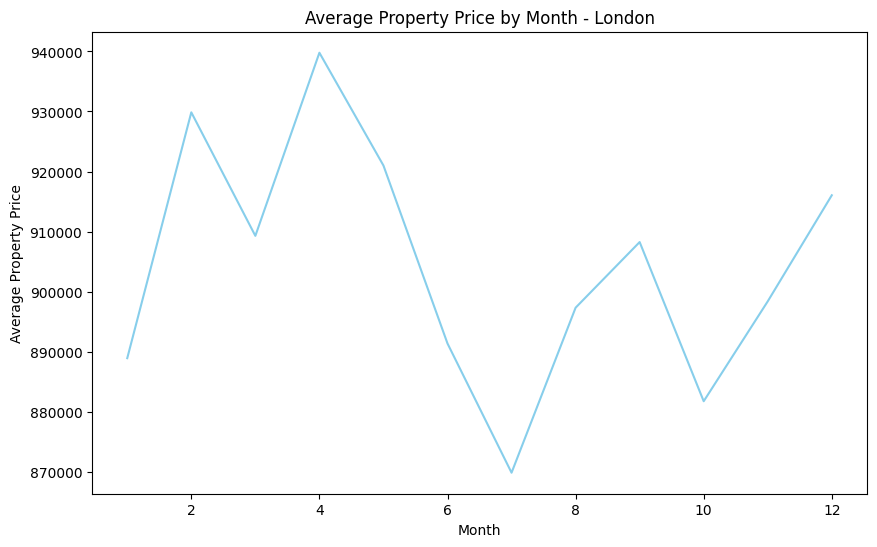

In [54]:
# Extract month from the date for seasonality analysis
df_london['Month'] = df_london.index.month

# Calculate the average property price by month
monthly_avg = df_london.groupby('Month')['Property_Price'].mean()

# Plot the seasonal monthly pattern
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', color='skyblue')
plt.title('Average Property Price by Month - London')
plt.xlabel('Month')
plt.ylabel('Average Property Price')
plt.xticks(rotation=0)
plt.show()

## Forecasting with Facebook Prophet

In [64]:
from prophet import Prophet

# Prepare data for Prophet - Prophet expects columns 'ds' and 'y'
df_prophet = df_london[['Property_Price']].reset_index()
df_prophet.columns = ['ds', 'y']  # 'ds' is the date, 'y' is the value we want to forecast

# Initialize Prophet model
model = Prophet()
model.fit(df_prophet)

14:31:27 - cmdstanpy - INFO - Chain [1] start processing
14:31:27 - cmdstanpy - INFO - Chain [1] done processing


c:\Users\Zekiye\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


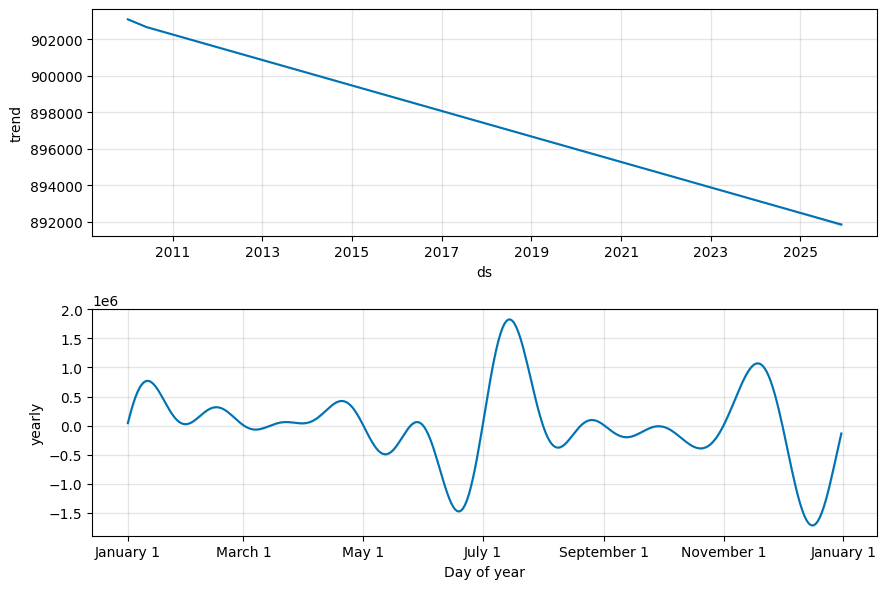

In [66]:
# Create future dataframe to see forecasts and trends
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# Plot the trend and seasonality
model.plot_components(forecast)
plt.show()

### Forecasting for the next 12 months

c:\Users\Zekiye\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


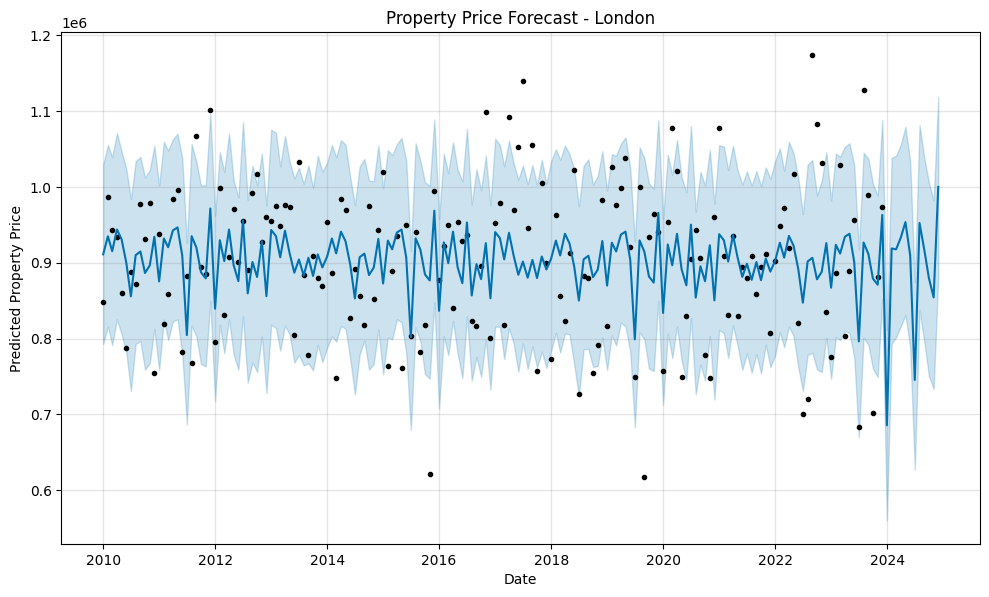

In [8]:
# Create a dataframe for future predictions (12 months into the future)
future = model.make_future_dataframe(periods=12, freq='M')

# Predict future property prices
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Property Price Forecast - London')
plt.xlabel('Date')
plt.ylabel('Predicted Property Price')
plt.show()

### Now it's time to look performance of this forecast results

In [85]:
# Create a train-test split for evaluation
train = df_london.iloc[:-12]  # Training data (all but last 12 months)
test = df_london.iloc[-12:]   # Test data (last 12 months)

train.head()

,City,Property_Price,Occupancy_Rate,Inflation_Rate,Population_Age_65+,Population_Age_65_Growth,Median_Age,Income_Level,Proximity_to_Healthcare,Walkability_Score,Crime_Rate,Property_Tax_Rate,Public_Transport_Access,Government_Incentives,Environmental_Quality,Senior_Living_Vacancy_Rate,Mental_Health_Programs,Memory_Care_Availability,Month
Date,,,,,,,,,,,,,,,,,,,
2010-01-01,London,848703,71,2.68,45565,2.13,42,76100,3,64,10,1,1,1,91.733793,12.690232,1,1,1
2010-02-01,London,986957,93,2.74,44538,2.77,47,38783,3,52,7,1,1,1,82.506671,5.833026,0,0,2
2010-03-01,London,943318,83,1.61,33963,0.70,42,59665,9,84,6,2,0,1,70.895383,13.320621,0,1,3
2010-04-01,London,934355,72,3.64,60330,1.96,44,40350,7,88,1,2,1,1,75.354998,9.718430,1,1,4
2010-05-01,London,860795,74,2.93,50283,2.65,46,57408,4,70,9,2,0,1,78.870686,12.438621,0,1,5


15:06:37 - cmdstanpy - INFO - Chain [1] start processing
15:06:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Zekiye\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


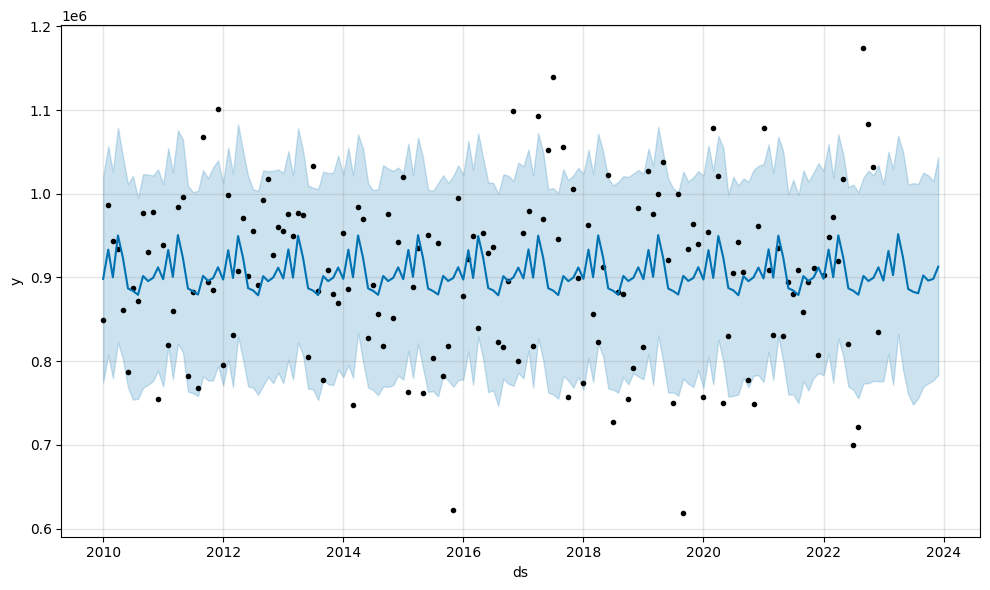

In [86]:
# Create a train-test split for evaluation
train = df_london.iloc[:-12]  # Training data (all but last 12 months)
test = df_london.iloc[-12:]   # Test data (last 12 months)

# Prepare the train dataset for Prophet
train_prophet = train[['Property_Price']].reset_index()
train_prophet.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for target value

# Initialize and fit the model on training data
model = Prophet(yearly_seasonality=True)
model.fit(train_prophet)

# Create a future dataframe to match the test set
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot the forecast and test data
model.plot(forecast)
plt.show()


### Compare Forecast to Actual Values

In [99]:
forecasted_values = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-01')]
print(forecasted_values[['ds', 'yhat']])


            ds           yhat
157 2023-01-31  931713.128534
158 2023-02-28  902753.331649
159 2023-03-31  951680.177855
160 2023-04-30  923374.925352
161 2023-05-31  886169.803270
162 2023-06-30  882886.157177
163 2023-07-31  880999.915644
164 2023-08-31  902270.576498
165 2023-09-30  896200.834424
166 2023-10-31  898256.457241
167 2023-11-30  912811.490106


In [96]:
#Extract actual values (reset index to have a comparable 'Date' column)
actual_values = test[['Property_Price']].reset_index()
print(actual_values)

         Date  Property_Price
0  2023-01-01          775664
1  2023-02-01          886668
2  2023-03-01         1029382
3  2023-04-01          803955
4  2023-05-01          888865
5  2023-06-01          955966
6  2023-07-01          683894
7  2023-08-01         1127769
8  2023-09-01          990111
9  2023-10-01          702068
10 2023-11-01          881834
11 2023-12-01          974229


In [98]:
comparison = pd.merge(forecasted_values[['ds', 'yhat']], actual_values[['Date', 'Property_Price']], left_on='ds', right_on='Date')
print(comparison[['ds', 'yhat', 'Property_Price']])

Empty DataFrame
Columns: [ds, yhat, Property_Price]
Index: []


In [92]:
# Extract forecasted values (ds is the date, yhat is the predicted value)
forecasted_values = forecast[['ds', 'yhat']].tail(12)  # Last 12 forecasted points (matching test set)

# Extract actual values (reset index to have a comparable 'Date' column)
actual_values = test[['Property_Price']].reset_index()
# Ensure 'ds' (from forecast) and 'Date' (from actual data) are both in datetime format
forecasted_values['ds'] = pd.to_datetime(forecasted_values['ds'])  # Prophet's forecast dates
actual_values['Date'] = pd.to_datetime(actual_values['Date'])  # Actual test set dates

# Check if the dates overlap (debugging step)
print("Forecast dates range:", forecasted_values['ds'].min(), "to", forecasted_values['ds'].max())
print("Actual dates range:", actual_values['Date'].min(), "to", actual_values['Date'].max())

# Merge forecast and actual values on the 'ds' (forecast) and 'Date' (actual) columns
comparison = pd.merge(forecasted_values[['ds', 'yhat']], actual_values[['Date', 'Property_Price']], left_on='ds', right_on='Date')

# Check the result of the merge
print(comparison[['ds', 'yhat', 'Property_Price']])


Forecast dates range: 2022-12-31 00:00:00 to 2023-11-30 00:00:00
Actual dates range: 2023-01-01 00:00:00 to 2023-12-01 00:00:00
Empty DataFrame
Columns: [ds, yhat, Property_Price]
Index: []


In [83]:


# Check that the 'ds' and 'Date' columns are in the same format (both should be datetime)
#forecasted_values['ds'] = pd.to_datetime(forecasted_values['ds'])
#actual_values['Date'] = pd.to_datetime(actual_values['Date'])

# Merge forecasted and actual values for comparison
comparison = pd.merge(forecasted_values, actual_values, left_on='ds', right_on='Date')
print(comparison)

# Display the comparison of forecasted vs. actual property prices
#comparison[['ds', 'yhat', 'Property_Price']]  # ds is the date, yhat is the predicted, Property_Price is actual


Empty DataFrame
Columns: [ds, yhat, Date, Property_Price]
Index: []


In [72]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import numpy as np
# Calculate MAE and RMSE
mae = mean_absolute_error(comparison['Property_Price'], comparison['yhat'])
rmse = np.sqrt(root_mean_squared_error(comparison['Property_Price'], comparison['yhat']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.